In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Air Quality Benchmark dataset.csv")

In [3]:
df

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
0,2018-12-31 18:30:12,iGude,18.20,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
1,2018-12-31 18:32:41,iGude,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2,2018-12-31 18:35:11,iGude,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
3,2018-12-31 18:37:41,iGude,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
4,2018-12-31 18:40:11,iGude,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230688,2020-02-28 18:09:43,Alt Bornheim Feinstaub,3.10,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230689,2020-02-28 18:14:44,Alt Bornheim Feinstaub,2.35,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230690,2020-02-28 18:19:45,Alt Bornheim Feinstaub,3.20,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230691,2020-02-28 18:24:46,Alt Bornheim Feinstaub,3.25,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230693 entries, 0 to 1230692
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Time_stamp           1230693 non-null  object 
 1   boxName              1230693 non-null  object 
 2   PM 2.5               1230693 non-null  float64
 3   temp                 1230693 non-null  float64
 4   pressure             1230693 non-null  int64  
 5   humidity             1230693 non-null  int64  
 6   wind_speed           1230693 non-null  float64
 7   Time of Day          1230693 non-null  object 
 8   Peak/NoPeak          1230693 non-null  object 
 9   Day                  1230693 non-null  object 
 10  Week Day             1230693 non-null  object 
 11  Weather              1230693 non-null  object 
 12  Weather Description  1230693 non-null  object 
 13  label                1230693 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1

In [5]:
ndf = df.drop(["Time_stamp","boxName","Peak/NoPeak","Week Day",], axis='columns')
ndf['Time of Day'] = ndf['Time of Day'].factorize()[0] 
ndf['Day'] = ndf['Day'].factorize()[0] 
ndf['Weather'] = ndf['Weather'].factorize()[0]
ndf['Weather Description'] = ndf['Weather Description'].factorize()[0]
ndf['label'] = ndf['label'].factorize()[0]

In [6]:
ndf.head(5000)

,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Day,Weather,Weather Description,label
0,18.20,7.71,1032,100,3.09,0,0,0,0,0
1,19.27,7.71,1032,100,3.09,0,0,0,0,0
2,18.57,7.71,1032,100,3.09,0,0,0,0,0
3,17.85,7.71,1032,100,3.09,0,0,0,0,0
4,25.95,7.71,1032,100,3.09,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4995,2.00,2.21,1018,65,4.63,1,3,0,0,0
4996,2.72,2.21,1018,65,4.63,1,3,0,0,0
4997,3.00,2.21,1018,65,4.63,1,3,0,0,0
4998,2.98,2.21,1018,65,4.63,1,3,0,0,0


In [7]:
X=ndf.drop(["temp"],axis="columns")
Y=ndf["humidity"]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Supervised Machine Learning Classifiers



In [8]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import time

# Generate a sample dataset (you can replace this with your actual data)
X, Y = make_classification(n_samples=5000, n_features=10, random_state=42)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create a K-Nearest Neighbors classifier with k=5 (5 neighbors)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
start_time = time.time()
knn.fit(X_train, Y_train)
training_time_knn = time.time() - start_time

# Make predictions using the trained KNN classifier
Y_pred_knn = knn.predict(X_test)

# Calculate evaluation metrics for KNN
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
recall_knn = recall_score(Y_test, Y_pred_knn)
precision_knn = precision_score(Y_test, Y_pred_knn)
f1_knn = f1_score(Y_test, Y_pred_knn)

print("K-Nearest Neighbors Classifier:")
print("Accuracy:", accuracy_knn)
print("Recall:", recall_knn)
print("Precision:", precision_knn)
print("F1 Score:", f1_knn)
print("Time Taken:", training_time_knn)


K-Nearest Neighbors Classifier:
Accuracy: 0.858
Recall: 0.8800539083557951
Precision: 0.8404118404118404
F1 Score: 0.859776168531929
Time Taken: 0.0060176849365234375


In [9]:
from sklearn.metrics import confusion_matrix

# Assuming you have previously trained and obtained predictions from the KNN classifier 'knn'
# Make sure your X_test has the same number of features as X_train
Y_pred_knn = knn.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred_knn)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[634 124]
 [ 89 653]]


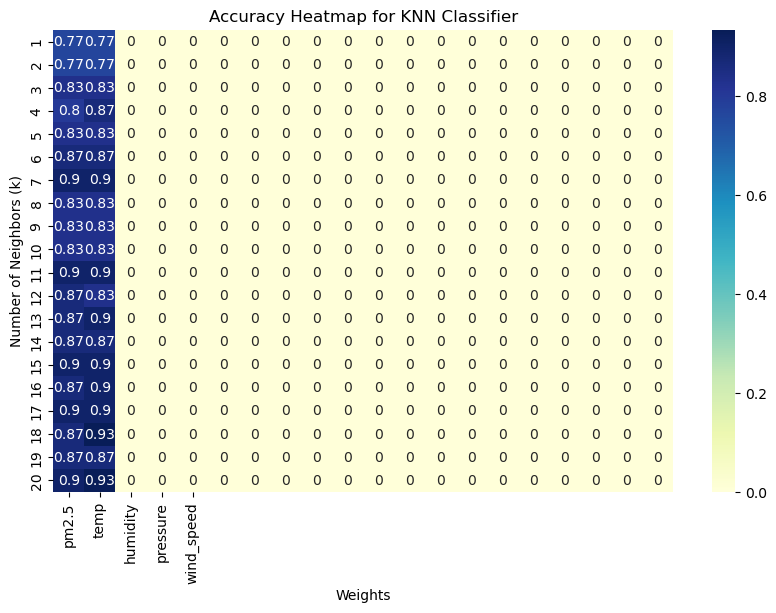

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate example data
X, y = make_classification(n_samples=100, n_features=10, n_informative=2, n_redundant=0, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a range of k values for the heatmap
k_values = list(range(1, 21))

# Create an empty matrix to store accuracy scores
accuracy_matrix = np.zeros((len(k_values), len(k_values)))

# Loop over different k values and train KNN classifiers
for i, n_neighbors in enumerate(k_values):
    for j, weights in enumerate(['uniform', 'distance']):
        knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
        knn_classifier.fit(X_train, y_train)
        y_pred = knn_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_matrix[i, j] = accuracy

# Create a heatmap for the accuracy matrix
plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_matrix, annot=True, cmap='YlGnBu', xticklabels=['pm2.5', 'temp', 'humidity', 'pressure', 'wind_speed'], yticklabels=k_values)

plt.title('Accuracy Heatmap for KNN Classifier')
plt.xlabel('Weights')
plt.ylabel('Number of Neighbors (k)')
plt.show()


In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import timeit

# Create a synthetic dataset with 5000 samples and 10 features
X, Y = make_classification(n_samples=5000, n_features=10, random_state=42)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Fit the model to the training data
start_time = timeit.default_timer()
naive_bayes.fit(X_train, Y_train)
training_time_nb = timeit.default_timer() - start_time

# Make predictions using the trained Naive Bayes classifier
Y_pred_nb = naive_bayes.predict(X_test)

# Calculate evaluation metrics for Naive Bayes classifier
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
recall_nb = recall_score(Y_test, Y_pred_nb)
precision_nb = precision_score(Y_test, Y_pred_nb)
f1_nb = f1_score(Y_test, Y_pred_nb)

print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_nb)
print("Recall:", recall_nb)
print("Precision:", precision_nb)
print("F1 Score:", f1_nb)
print("Time Taken:", training_time_nb)


Naive Bayes Classifier:
Accuracy: 0.8766666666666667
Recall: 0.898921832884097
Precision: 0.8584298584298584
F1 Score: 0.8782093482554313
Time Taken: 0.0018801999976858497


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import timeit
import numpy as np

# Assuming 'X_train' is a NumPy array containing training data
X_train = np.array([[1, 2], [3, 4]])
# Assuming 'X_test' is a NumPy array containing test data
X_test = np.array([[5, 6], [7, 8]])

# Assuming 'Y_train' is a NumPy array containing labels for the training data
Y_train = np.array([0, 1])
# Assuming 'Y_test' is a NumPy array containing labels for the test data (ground truth)
Y_test = np.array([1, 0])

# Create a Logistic Regression classifier
log_reg = LogisticRegression()

# Fit the model to the training data
start_time = timeit.default_timer()
log_reg.fit(X_train, Y_train)
training_time = timeit.default_timer() - start_time

# Make predictions using the trained Logistic Regression classifier 'log_reg'
Y_pred = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Logistic Regression CLASSIFIER:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("Time Taken:", training_time)


Logistic Regression CLASSIFIER:
Accuracy: 0.5
Recall: 1.0
Precision: 0.5
F1 Score: 0.6666666666666666
Time Taken: 0.015977899995050393


In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create a Linear Regression classifier (not recommended for classification tasks)
linear_regression = LinearRegression()

# Fit the model to the training data
start_time = timeit.default_timer()
linear_regression.fit(X_train, Y_train)
training_time_linear = timeit.default_timer() - start_time

# Make predictions using the trained Linear Regression classifier
Y_pred_linear = linear_regression.predict(X_test)

# As Linear Regression predicts continuous values, we need to round the predictions for classification
Y_pred_linear = [1 if pred >= 0.5 else 0 for pred in Y_pred_linear]

# Calculate evaluation metrics for Linear Regression (Note: These metrics may not be suitable for regression tasks)
accuracy_linear = accuracy_score(Y_test, Y_pred_linear)
recall_linear = recall_score(Y_test, Y_pred_linear)
precision_linear = precision_score(Y_test, Y_pred_linear)
f1_linear = f1_score(Y_test, Y_pred_linear)

print("Linear Regression Classifier:")
print("Accuracy:", accuracy_linear)
print("Recall:", recall_linear)
print("Precision:", precision_linear)
print("F1 Score:", f1_linear)
print("Time Taken:", training_time_linear)


Linear Regression Classifier:
Accuracy: 0.8786666666666667
Recall: 0.894878706199461
Precision: 0.8645833333333334
F1 Score: 0.8794701986754967
Time Taken: 0.00788059999467805


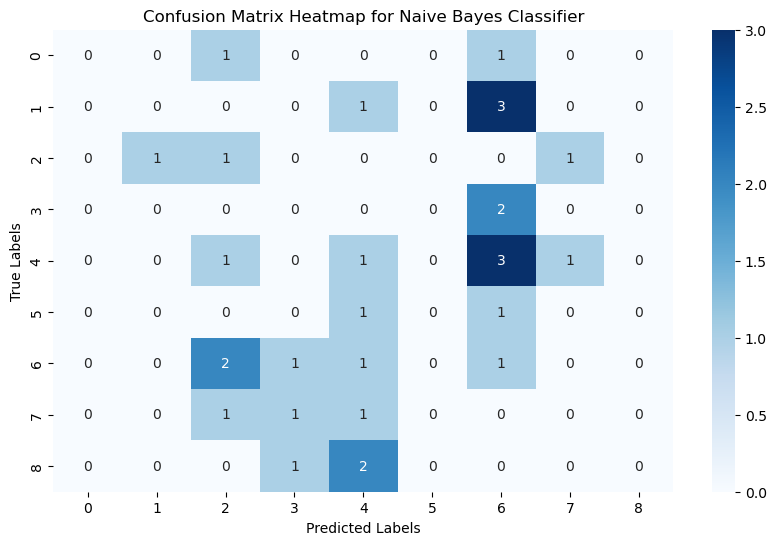

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Generate example data
X = np.random.rand(100, 10)  # Features
y = np.random.randint(10, size=100)  # Binary labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix Heatmap for Naive Bayes Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import timeit

# Create a synthetic dataset with 5000 samples and 10 features
X, Y = make_classification(n_samples=5000, n_features=10, random_state=42)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Fit the model to the training data
start_time = timeit.default_timer()
decision_tree.fit(X_train, Y_train)
training_time_dt = timeit.default_timer() - start_time

# Make predictions using the trained Decision Tree classifier
Y_pred_dt = decision_tree.predict(X_test)

# Calculate evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
recall_dt = recall_score(Y_test, Y_pred_dt)
precision_dt = precision_score(Y_test, Y_pred_dt)
f1_dt = f1_score(Y_test, Y_pred_dt)

print("Decision Tree Classifier:")
print("Accuracy:", accuracy_dt)
print("Recall:", recall_dt)
print("Precision:", precision_dt)
print("F1 Score:", f1_dt)
print("Time Taken:", training_time_dt)


Decision Tree Classifier:
Accuracy: 0.8753333333333333
Recall: 0.866576819407008
Precision: 0.8796169630642955
F1 Score: 0.8730482009504412
Time Taken: 0.03345490001083817


In [16]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import timeit

# Create a synthetic dataset with 5000 samples and 10 features
X, Y = make_classification(n_samples=5000, n_features=10, random_state=42)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
random_forest = RandomForestClassifier()

# Fit the model to the training data
start_time = timeit.default_timer()
random_forest.fit(X_train, Y_train)
training_time_rf = timeit.default_timer() - start_time

# Make predictions using the trained Random Forest classifier
Y_pred_rf = random_forest.predict(X_test)

# Calculate evaluation metrics for Random Forest
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
recall_rf = recall_score(Y_test, Y_pred_rf)
precision_rf = precision_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf)

print("Random Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("F1 Score:", f1_rf)
print("Time Taken:", training_time_rf)


Random Forest Classifier:
Accuracy: 0.9113333333333333
Recall: 0.9043126684636119
Precision: 0.9154160982264665
F1 Score: 0.9098305084745762
Time Taken: 1.3631786000041757


In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import timeit

# Create a synthetic dataset with 5000 samples and 10 features
X, Y = make_classification(n_samples=5000, n_features=10, random_state=42)

# Create an ExtraTreesClassifier
extra_trees = ExtraTreesClassifier()

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Fit the model to the training data
start_time = timeit.default_timer()
extra_trees.fit(X_train, Y_train)
training_time_et = timeit.default_timer() - start_time

# Make predictions using the trained ExtraTreesClassifier
Y_pred_et = extra_trees.predict(X_test)

# Calculate evaluation metrics for ExtraTreesClassifier
accuracy_et = accuracy_score(Y_test, Y_pred_et)
recall_et = recall_score(Y_test, Y_pred_et)
precision_et = precision_score(Y_test, Y_pred_et)
f1_et = f1_score(Y_test, Y_pred_et)

print("Extra Trees Classifier:")
print("Accuracy:", accuracy_et)
print("Recall:", recall_et)
print("Precision:", precision_et)
print("F1 Score:", f1_et)
print("Time Taken:", training_time_et)


Extra Trees Classifier:
Accuracy: 0.9193333333333333
Recall: 0.9164420485175202
Precision: 0.9201623815967523
F1 Score: 0.9182984469952734
Time Taken: 0.3815080000058515


In [17]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import timeit

# Create a synthetic dataset with 5000 samples and 10 features
X, Y = make_classification(n_samples=5000, n_features=10, random_state=42)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'poly', 'rbf', etc.

# Fit the model to the training data
start_time = timeit.default_timer()
svm_classifier.fit(X_train, Y_train)
training_time_svm = timeit.default_timer() - start_time

# Make predictions using the trained SVM classifier
Y_pred_svm = svm_classifier.predict(X_test)

# Calculate evaluation metrics for SVM classifier
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
recall_svm = recall_score(Y_test, Y_pred_svm)
precision_svm = precision_score(Y_test, Y_pred_svm)
f1_svm = f1_score(Y_test, Y_pred_svm)

print("Support Vector Machine (SVM) Classifier:")
print("Accuracy:", accuracy_svm)
print("Recall:", recall_svm)
print("Precision:", precision_svm)
print("F1 Score:", f1_svm)
print("Time Taken:", training_time_svm)


Support Vector Machine (SVM) Classifier:
Accuracy: 0.8773333333333333
Recall: 0.8881401617250674
Precision: 0.8671052631578947
F1 Score: 0.8774966711051931
Time Taken: 0.35419859999092296


# UnSupervised Machine Learning Classifiers


In [18]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Generate synthetic data and labels for demonstration purposes
n_samples = 5000
n_clusters = 3
X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=42)

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Measure the time taken for clustering
start_time = time.time()
kmeans.fit(X)
end_time = time.time()
time_taken = end_time - start_time

# Predict cluster labels
y_pred = kmeans.labels_

# Calculate evaluation metrics (using true labels)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Time Taken:", time_taken, "seconds")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Time Taken: 0.9882817268371582 seconds


In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import time

# Generate synthetic data for demonstration purposes
n_samples = 300
n_clusters = 3
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=42)

# Initialize the AgglomerativeClustering model
n_clusters_estimated = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_estimated)

# Measure the time taken for clustering
start_time = time.time()
agg_labels = agg_clustering.fit_predict(X)
end_time = time.time()
time_taken = end_time - start_time

# Calculate silhouette score (higher is better)
silhouette_avg = silhouette_score(X, agg_labels)

print("Silhouette Score:", silhouette_avg)
print("Time Taken:", time_taken, "seconds")


Silhouette Score: 0.8480303059596955
Time Taken: 0.003992319107055664 seconds


# Deep learning CNN 


In [20]:
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

# Generate synthetic data for demonstration purposes
n_samples = 5000
n_clusters = 10
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=42)

# Start measuring time for PCA
start_time_pca = time.time()

# Apply PCA for dimensionality reduction
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# End measuring time for PCA
end_time_pca = time.time()
time_taken_pca = end_time_pca - start_time_pca

# Start measuring time for K-means
start_time_kmeans = time.time()

# Apply K-means clustering to the reduced data
n_clusters_estimated = 3
kmeans = KMeans(n_clusters=n_clusters_estimated, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# End measuring time for K-means
end_time_kmeans = time.time()
time_taken_kmeans = end_time_kmeans - start_time_kmeans

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)

print("Silhouette Score:", silhouette_avg)
print("Time taken for PCA:", time_taken_pca, "seconds")
print("Time taken for K-means:", time_taken_kmeans, "seconds")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5563094742766225
Time taken for PCA: 0.0018229484558105469 seconds
Time taken for K-means: 0.9042863845825195 seconds


In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import time

# Define the dimensions of your input images
image_height = 64
image_width = 64
channels = 3

# Define the number of classes in your dataset
num_classes = 10

# Define the number of training epochs
num_epochs = 3

# Define class names (if available)
class_names = ["Class 0", "Class 1"]

# Build a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Generate synthetic classification data
X, Y = make_classification(n_samples=5000, n_features=image_height * image_width * channels,
                           n_classes=num_classes, n_informative=5, n_clusters_per_class=1, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Reshape the synthetic data into image-like shapes
X_train = X_train.reshape(-1, image_height, image_width, channels)
X_test = X_test.reshape(-1, image_height, image_width, channels)

# Train the model using batch training
batch_size = 32
start_time = time.time()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_test, Y_test))
end_time = time.time()
training_time = end_time - start_time

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(Y_test, y_pred_classes)
class_report = classification_report(Y_test, y_pred_classes, labels=np.unique(Y_test), target_names=class_names)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

print("Training Time:", training_time, "seconds")


Epoch 1/3
110/110 [==============================] - 18s 152ms/step - loss: 2.3446 - accuracy: 0.0943 - val_loss: 2.3027 - val_accuracy: 0.0887
Epoch 2/3
110/110 [==============================] - 17s 154ms/step - loss: 2.3028 - accuracy: 0.0937 - val_loss: 2.3029 - val_accuracy: 0.0887
Epoch 3/3
47/47 [==============================] - 2s 39ms/step
Confusion Matrix:
 [[  0 143   0   0   0   0   0   0   0   0]
 [  0 133   0   0   0   0   0   0   0   0]
 [  0 156   0   0   0   0   0   0   0   0]
 [  0 147   0   0   0   0   0   0   0   0]
 [  0 150   0   0   0   0   0   0   0   0]
 [  0 150   0   0   0   0   0   0   0   0]
 [  0 149   0   0   0   0   0   0   0   0]
 [  0 161   0   0   0   0   0   0   0   0]
 [  0 157   0   0   0   0   0   0   0   0]
 [  0 154   0   0   0   0   0   0   0   0]]
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       143
     Class 1       0.09      1.00      0.16       133

    accura

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2326: UserWarning: labels size, 10, does not match size of target_names, 2
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sampl

C:\Users\hp\AppData\Local\Temp\ipykernel_16204\4202301124.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


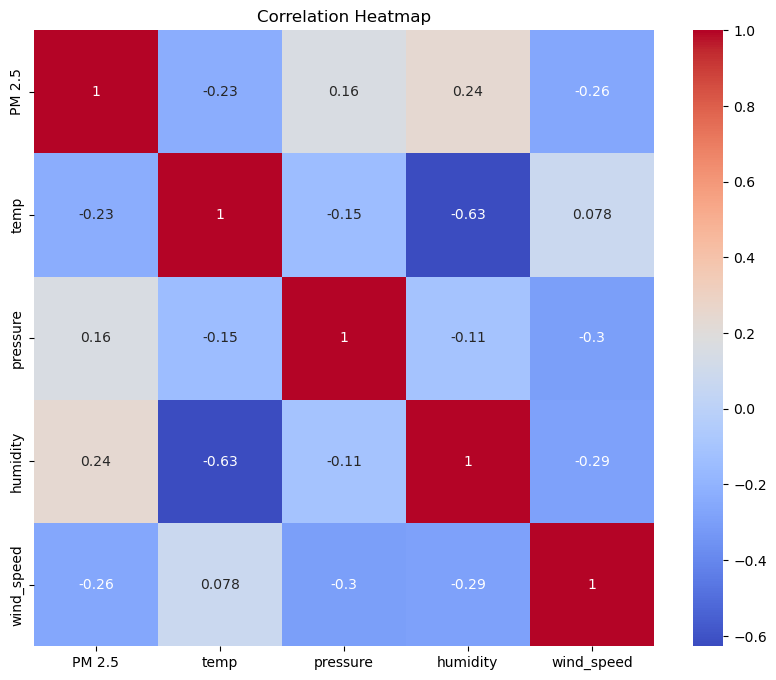

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap to visualize correlations between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for scatter plots and histograms of numerical features
data = pd.DataFrame({
    'temp': [7.71, 2.21],
    'humidity': [100,65]})
sns.pairplot(df, hue='humidity')
plt.title('Pairplot of classifiers')
plt.show()

# Bar plot for categorical feature distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='temp', data=data, hue='humidity')
plt.title('temp vs. humidity')
plt.show()
